In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [185]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def getCSV ():
    global df
    
    import_file_path = filedialog.askopenfilename()
    df = pd.read_excel (import_file_path)
    df = pd.DataFrame(df)
    
browseButton_CSV = tk.Button(text="      Import XLSX File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=browseButton_CSV)

root.mainloop()

In [186]:
sample_incomplete_rows = df[df.isnull().any(axis=1)] # mark all values of data frame that contains NaN

In [149]:
#sample_incomplete_rows

In [180]:
df

Age Gender    BW   BH      Diagnosis  Wmax
0      40      W  57.0  165     Brustkrebs   130
1      51      W  63.0  159     Brustkrebs   131
2      66      M  66.0  165  Prostatakrebs   118
3      66      W  86.0  155     Brustkrebs    75
4      72      M  72.0  170      Colon-Ca.   105
...   ...    ...   ...  ...            ...   ...
1707   55      M  63.0  163   Schilddrüsen    87
1708   57      W  71.0  164     Brustkrebs    57
1709   65      W  63.0  168     Brustkrebs   112
1710   67      W  68.0  163     Brustkrebs    84
1711   53      W  89.0  169           Ovar   175

[1712 rows x 6 columns]

In [184]:
#sample_incomplete_rows.dropna(subset=["Datum_ET"]) # drops only rows from corresponding attribut
df.dropna(subset=["Diagnosis"], inplace=True) # drops all rows of data frame according to corresponding attribut

In [162]:
#df= df.loc[df["Diagnosis"]=="Brustkrebs"]

In [187]:
#df['Gender']= (df["Geschlecht"]=="M").astype(int) # New attribut changing W and M into binary. 1 is a male
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1712 non-null   int64  
 1   Gender     1712 non-null   object 
 2   BW         1712 non-null   float64
 3   BH         1712 non-null   int64  
 4   Diagnosis  1711 non-null   object 
 5   Wmax       1712 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 80.4+ KB


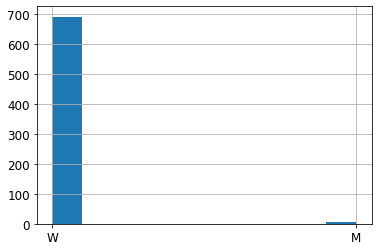

In [94]:
df['Gender'].hist(label=int,align='mid')

In [188]:
def bmi(bw,bh): # function to calculate bmi index
    return bw/((bh/100)*(bh/100))

In [189]:
df['BMI']=bmi(df.iloc[:,2],df.iloc[:,3]) # add a new column with the name "BMI"

In [190]:
df.describe()

Age           BW           BH         Wmax          BMI
count  1712.000000  1712.000000  1712.000000  1712.000000  1712.000000
mean     55.765771    75.929030   168.342874   118.494743    26.726015
std      10.930445    16.636734     8.964106    41.874907     5.137146
min      18.000000    38.000000   136.000000    26.000000    15.570934
25%      49.000000    63.000000   162.000000    88.000000    23.183603
50%      56.000000    73.500000   168.000000   112.000000    25.884072
75%      62.000000    86.000000   174.000000   141.000000    29.666548
max      88.000000   143.000000   200.000000   327.000000    49.480969

Saving figure attribute_histogram_plots


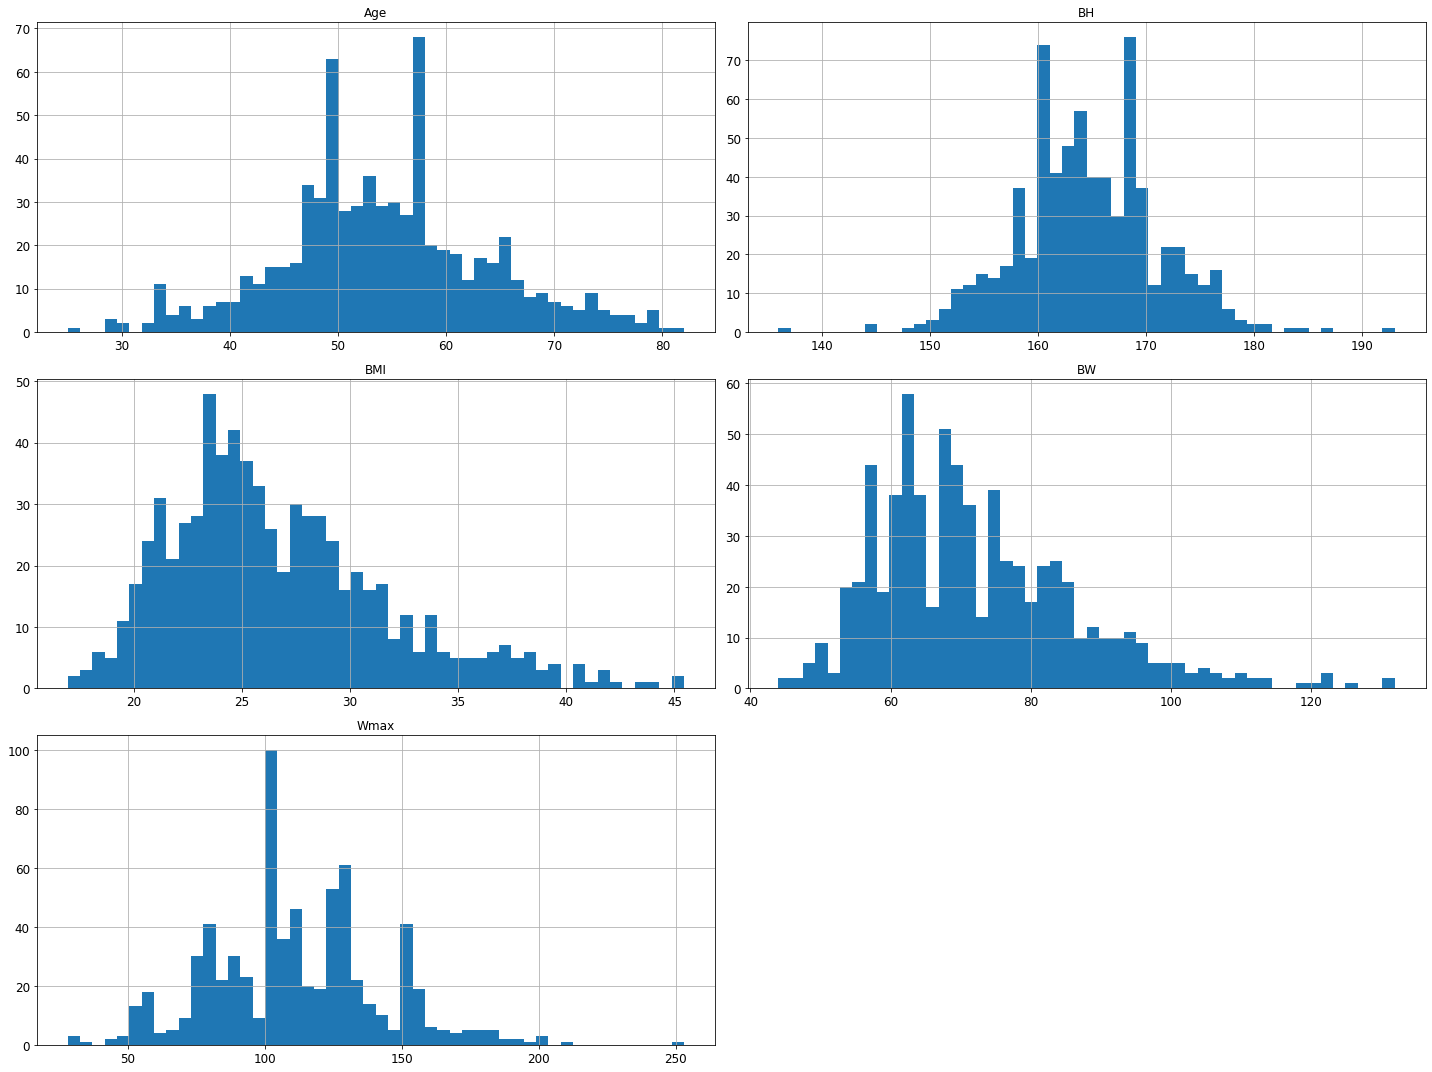

In [154]:
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [191]:
# to make this notebook's output identical at every run
np.random.seed(42)


In [192]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [193]:
len(test_set)

343

In [194]:
len(train_set)

1369

In [195]:
df["Diagnosis"].value_counts()

Brustkrebs                     699
Prostatakrebs                  141
Rectum-Ca.                      66
Colon-Ca.                       60
Ovar                            59
                              ... 
Glomustumor                      1
Polycythämia vera                1
Langerhans-Zell-Histiozyste      1
Thymom                           1
Sinus Piriformis-Ca.             1
Name: Diagnosis, Length: 72, dtype: int64

In [32]:
df["Fitness Level_1st"] = pd.cut(df["Wmax"], # Categorize fitness level in three categories according to % of achieved                                                                          performance. Categories: "3" = low fitness ; "2" = medium fitness ; "1" =                                                                        good fitness
                               bins=[0., 49.99, 79.99, np.inf],
                               labels=[3, 2, 1])

In [33]:
df["Fitness Level_1st"].value_counts()

1    1407
2     272
3      32
Name: Fitness Level_1st, dtype: int64

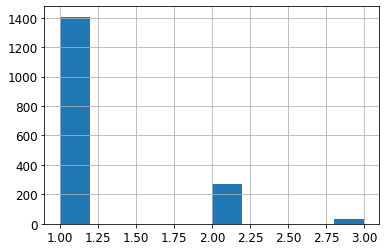

In [34]:
df["Fitness Level_1st"].hist() # Number of subjects in corresponding category

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
# Split train and test data in fitness categories and train/test them separately.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df, df["Diagnosis"].value_counts() > 1):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

ValueError: Found input variables with inconsistent numbers of samples: [1711, 79]

In [41]:
strat_test_set["Gender"].value_counts() / len(strat_test_set)

W    0.658892
M    0.341108
Name: Gender, dtype: float64

In [466]:
def fitness_level_proportions(data):
    return data["Fitness Level_1st"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": fitness_level_proportions(df),
    "Stratified": fitness_level_proportions(strat_test_set),
    "Random": fitness_level_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [467]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
3  0.068341    0.067055  0.069971      2.384690      -1.881339
2  0.363318    0.364431  0.367347      1.108997       0.306544
1  0.568341    0.568513  0.562682     -0.995688       0.030263

In [65]:
corr_matrix = df.corr()

In [66]:
corr_matrix["Wmax"].sort_values(ascending=False)

Wmax    1.000000
BH      0.512673
BW      0.355083
BMI     0.107285
Age    -0.321189
Name: Wmax, dtype: float64

Saving figure scatter_matrix_plot


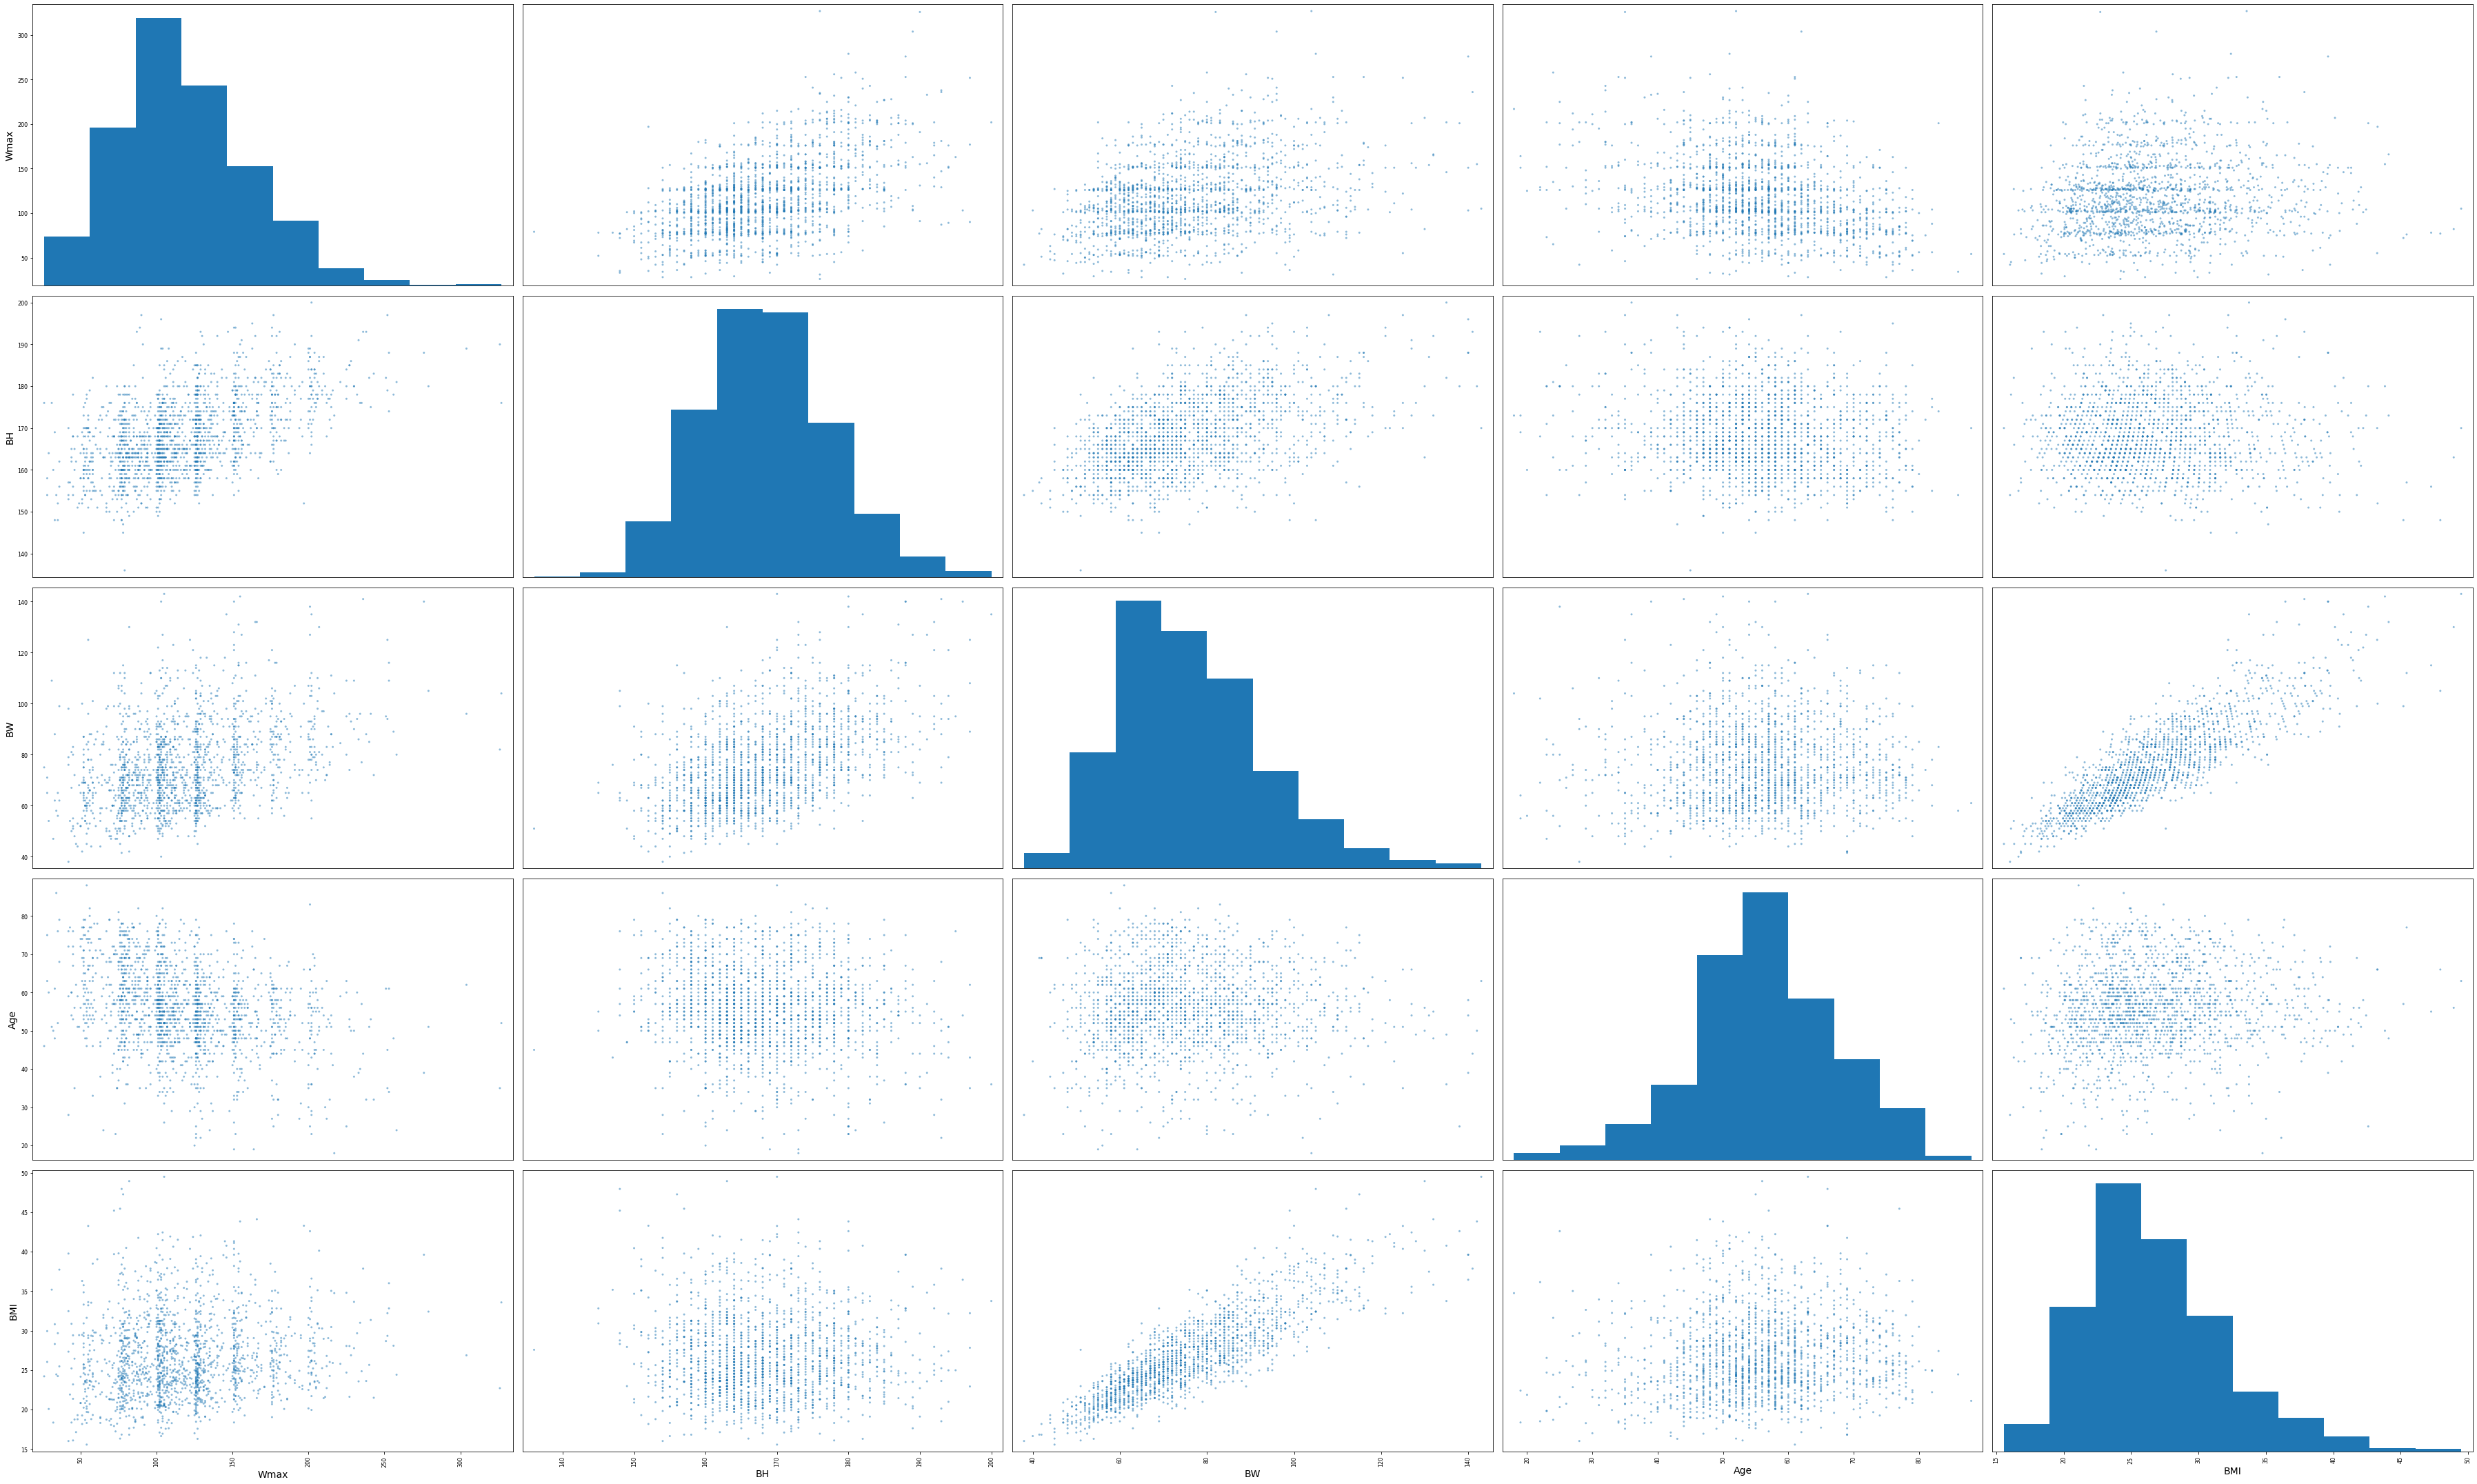

In [64]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Wmax", "BH", "BW","Age","BMI"]
scatter_matrix(df[attributes], figsize=(50, 30))
save_fig("scatter_matrix_plot")

In [103]:
sorted(train_set)

['Age', 'BH', 'BMI', 'BW', 'Diagnosis', 'Gender', 'Wmax']

In [196]:
train_labels = train_set["Wmax"].copy() # save a copy of corresponding variable
train_set = train_set.drop(["Wmax","Diagnosis"], axis=1) # drop labels for training set


In [197]:
train_num = train_set.drop('Gender', axis=1) # only numeric variables

In [198]:
train_num

Age    BW   BH        BMI
408    54  51.0  168  18.069728
1357   63  84.0  171  28.726788
518    61  84.0  170  29.065744
1111   62  63.0  164  23.423557
538    76  65.0  148  29.674945
...   ...   ...  ...        ...
1130   49  87.0  178  27.458654
1294   53  67.0  159  26.502116
860    71  77.0  160  30.078125
1459   59  72.0  175  23.510204
1126   55  73.0  168  25.864512

[1369 rows x 4 columns]

In [199]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

train_transf = pipeline.fit_transform(train_num)

In [200]:
train_transf

array([[-0.15967596, -1.51125216, -0.03854364, -1.69784767],
       [ 0.66694906,  0.47054314,  0.29754705,  0.37277885],
       [ 0.48325461,  0.47054314,  0.18551682,  0.43863677],
       ...,
       [ 1.40172686,  0.05016232, -0.93478547,  0.63533859],
       [ 0.29956016, -0.2501097 ,  0.74566797, -0.64078367],
       [-0.06782874, -0.1900553 , -0.03854364, -0.18335043]])

In [201]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ["Gender"]

full_pipeline = ColumnTransformer([
        ("num", pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_set) # here we used train_set because cat_attribs (in order to get data)

In [202]:
train_prepared

array([[-0.15967596, -1.51125216, -0.03854364, -1.69784767,  0.        ,
         1.        ],
       [ 0.66694906,  0.47054314,  0.29754705,  0.37277885,  1.        ,
         0.        ],
       [ 0.48325461,  0.47054314,  0.18551682,  0.43863677,  1.        ,
         0.        ],
       ...,
       [ 1.40172686,  0.05016232, -0.93478547,  0.63533859,  0.        ,
         1.        ],
       [ 0.29956016, -0.2501097 ,  0.74566797, -0.64078367,  0.        ,
         1.        ],
       [-0.06782874, -0.1900553 , -0.03854364, -0.18335043,  0.        ,
         1.        ]])

# Select and train a model

In [203]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [105.33415049 126.7022802  127.85848496  94.37778441  54.54081623]


In [210]:
print("Labels:", list(some_labels))

Labels: [92, 126, 177, 129, 35]


In [212]:
from sklearn.metrics import mean_squared_error

watt_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, watt_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE is: ",lin_rmse)

RMSE is:  32.46354580734144


In [213]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_labels, watt_predictions)
lin_mae

25.067726288249343

In [214]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [215]:
# let's try the full preprocessing pipeline on a few training instances
some_data_tree = train_set.iloc[:5]
some_labels_tree = train_labels.iloc[:5]
some_data_prepared_tree = full_pipeline.transform(some_data_tree)

print("Predictions:", tree_reg.predict(some_data_prepared_tree))

Predictions: [ 92. 126. 177. 129.  35.]


In [216]:
print("Labels:", list(some_labels_tree))

Labels: [92, 126, 177, 129, 35]


In [217]:
watt_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, watt_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # unfortunatelly this model overfits compared to previous model, although the predicting result is the same

3.649099071296948

# Fine-tune my model

In [218]:
from sklearn.model_selection import cross_val_score
'''The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:'''

scores = cross_val_score(tree_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [219]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [52.19251282 42.7583816  52.22852997 46.48271007 45.99900824 40.64186203
 49.85638133 41.6025687  44.08195751 45.32537596]
Mean: 46.11692882313735
Standard deviation: 3.9344491743494383


In [220]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores) #'''That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.'''

Scores: [30.53455934 27.46985412 38.43562164 32.76486023 38.07501257 31.38868645
 31.97227142 31.11989247 32.31836557 30.94683766]
Mean: 32.50259614886735
Standard deviation: 3.184513995300587


In [234]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [235]:
some_data_RF = train_set.iloc[:5]
some_labels_RF = train_labels.iloc[:5]
some_data_prepared_RF = full_pipeline.transform(some_data_RF)

print("Predictions:", forest_reg.predict(some_data_prepared_RF))

Predictions: [ 92.43 119.03 159.46 121.16  47.89]


In [236]:
print("Labels:", list(some_labels_tree))

Labels: [92, 126, 177, 129, 35]


In [238]:
watt_RF_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, watt_RF_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE is: ", forest_rmse)

RMSE is:  13.078592962697485


In [239]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [34.41167315 29.82213183 40.39247186 34.37520891 36.24074161 31.67441744
 34.49259181 31.78694634 33.58427049 33.96558781]
Mean: 34.07460412488601
Standard deviation: 2.7261035077436997


In [226]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_prepared, train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [227]:
some_data_SVR = train_set.iloc[:5]
some_labels_SVR = train_labels.iloc[:5]
some_data_prepared_SVR = full_pipeline.transform(some_data_SVR)

print("Predictions:", svm_reg.predict(some_data_prepared_SVR))

Predictions: [106.34808927 122.95813918 124.21199321  94.10238676  55.41180185]


In [228]:
print("Labels:", list(some_labels_SVR))

Labels: [92, 126, 177, 129, 35]


In [229]:
watt_SVR_predictions = svm_reg.predict(train_prepared)
SVR_mse = mean_squared_error(train_labels, watt_SVR_predictions)
SVR_rmse = np.sqrt(SVR_mse)
print ("RMSE is: ",SVR_rmse)

RMSE is:  32.615674028371714


In [231]:
from sklearn.model_selection import cross_val_score

SVR_scores = cross_val_score(svm_reg, train_prepared, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
SVR_rmse_scores = np.sqrt(-SVR_scores)
display_scores(SVR_rmse_scores)

Scores: [31.19126727 27.5297865  38.9271332  33.18049647 38.51193615 31.05314042
 31.92811072 30.98819848 32.00674191 30.15057619]
Mean: 32.54673873052626
Standard deviation: 3.387883572916082


In [245]:
scores = cross_val_score(lin_reg,  train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
scores_rf = cross_val_score(forest_reg,  train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
scores_svr = cross_val_score(svm_reg,  train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
a = pd.Series(np.sqrt(-scores)).describe()
b = pd.Series(np.sqrt(-scores_svr)).describe()
c = pd.Series(np.sqrt(-scores_rf)).describe()
scores_df = pd.DataFrame({
    "lin_reg": a,
    "SVR":b,
    "forest_reg": c
    
})


In [246]:
scores_df

lin_reg        SVR  forest_reg
count  10.000000  10.000000   10.000000
mean   32.502596  32.546739   34.074604
std     3.356772   3.571143    2.873565
min    27.469854  27.529786   29.822132
25%    30.990101  31.004434   32.236277
50%    31.680479  31.559689   34.170398
75%    32.653237  32.887058   34.472362
max    38.435622  38.927133   40.392472

# Predicting WATT

In [183]:
import warnings
warnings.filterwarnings("ignore")

age = input("Please enter the age: ")
age = int(age)
bmi = input ("Please ebter the bmi: ")
bmi = int(bmi)
bh = input("Please enter the body height: ")
bh = int(bh)
bw = input("Please enter the body weight: ")
bw = int(bw)
g = input("Please enter your gender(W for women or M for man): ").upper()
#d = input("Please enter your diagnosys: ")
a = pd.DataFrame({'Age':[age],'BMI':[bmi],'Gender':[g],'BH':[bh],'BW':[bw]})#,'Diagnosen':[d]})
b = full_pipeline.transform(a)
svm_reg.predict(b)

array([165.21917734])

In [249]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100, 200, 300, 400, 500, 600, 700, 800, 900], 'max_features': [2,3,4,5,6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100, 200, 300, 400, 500], 'max_features': [2, 3, 4, 5, 6]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [147]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [144]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [145]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

31.268033340083537 {'max_features': 2, 'n_estimators': 3}
29.716119892515863 {'max_features': 2, 'n_estimators': 10}
28.724570649126253 {'max_features': 2, 'n_estimators': 30}
28.105968825101396 {'max_features': 2, 'n_estimators': 100}
28.066826921422873 {'max_features': 2, 'n_estimators': 200}
28.090020657947367 {'max_features': 2, 'n_estimators': 300}
28.058542783641023 {'max_features': 2, 'n_estimators': 400}
28.021501411726824 {'max_features': 2, 'n_estimators': 500}
31.334307107340592 {'max_features': 3, 'n_estimators': 3}
28.857258096232147 {'max_features': 3, 'n_estimators': 10}
28.502337099936426 {'max_features': 3, 'n_estimators': 30}
28.185273837275076 {'max_features': 3, 'n_estimators': 100}
28.152685649984846 {'max_features': 3, 'n_estimators': 200}
28.21899713816847 {'max_features': 3, 'n_estimators': 300}
28.140301542620747 {'max_features': 3, 'n_estimators': 400}
28.129381376230107 {'max_features': 3, 'n_estimators': 500}
32.11738672050999 {'max_features': 4, 'n_estimato

In [377]:
# pd.DataFrame(grid_search.cv_results_)

In [192]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [193]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 7, 'n_estimators': 180}
34.82414849047345 {'max_features': 5, 'n_estimators': 15}
33.831655099381045 {'max_features': 3, 'n_estimators': 72}
34.51692729880591 {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
33.825156929457506 {'max_features': 3, 'n_estimators': 75}
33.794862854326254 {'max_features': 3, 'n_estimators': 88}
33.92581550398184 {'max_features': 5, 'n_estimators': 100}
33.70397946438795 {'max_features': 3, 'n_estimators': 150}
40.79093345338655 {'max_features': 5, 'n_estimators': 2}


In [194]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.27776604, 0.1827683 , 0.24273837, 0.18307343, 0.06129056,
       0.0523633 ])

In [247]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

NameError: name 'feature_importances' is not defined

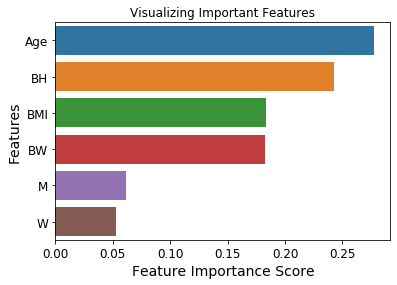

In [196]:
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(feature_importances,index=attributes).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [197]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Wmax", axis=1)
y_test = test_set["Wmax"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [198]:
final_rmse

34.0354154220573

In [199]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_oob = final_model.predict(X_test_prepared)
print("R2",r2_score(y_test, y_oob))
print("R2",final_model.oob_score)
#print("Accuracy:",metrics.auc(y_test, y_oob))
#score(final_predictions, y_test,sample_weight=None)

R2 0.33023742031569403
R2 False


We can compute a 95% confidence interval for the test RMSE:

In [200]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([30.97268113, 36.84443011])

In [202]:
from sklearn.metrics import roc_auc_score
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(train_prepared, train_labels)
    print(min_samples, "min samples")
    roc = roc_auc_score(train_labels, model.predict(train_labels))
    print('C-stat: ', roc)
    results.append(roc)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

1 min samples


ValueError: Expected 2D array, got 1D array instead:
array=[ 92. 126. 177. ...  81.  96. 104.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.